<a href="https://colab.research.google.com/github/Jalalbaim/Basic-Optimization-Problems/blob/main/DeeplLabV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medical image processing Homework

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import torchvision
from torch import nn

In [ ]:
# Paths
train_img_dir = "/content/drive/MyDrive/MIP/dataset/train_imgs"
train_label_dir = "/content/drive/MyDrive/MIP/dataset/train_lbs"
test_img_dir = "/content/drive/MyDrive/MIP/dataset/test_imgs"

## DataLoader

In [ ]:


transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

class train_dataset(Dataset):
    def __init__(self, img_dir, label_dir, transform=None):
        self.img_dir = img_dir
        self.label_dir = label_dir
        self.transform = transform
        self.images = os.listdir(img_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        label_name = img_name.replace('.png', '.npy')
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        label_path = os.path.join(self.label_dir, label_name)
        label = np.load(label_path)
        if self.transform:
            image = self.transform(image)

        label_resized = Image.fromarray(label).resize((256, 256), resample=Image.NEAREST)
        label_tensor = torch.from_numpy(np.array(label_resized)).long()

        return image, label_tensor

train_data = train_dataset(train_img_dir, train_label_dir, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

for images, labels in train_loader:
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')
    break


Image batch shape: torch.Size([32, 3, 256, 256])
Label batch shape: torch.Size([32, 256, 256])


In [ ]:
class test_dataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.images = os.listdir(img_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.img_dir, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

test_data = test_dataset(test_img_dir, transform=transform)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

for images in test_loader:
    print(f'Image batch shape: {images.shape}')
    break

Image batch shape: torch.Size([32, 3, 256, 256])


## Model

In [ ]:
# model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
# model.classifier[4] = nn.Conv2d(256, 5, kernel_size=(1, 1))
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# print(device)
# model = model.to(device)

# # Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
#     model.train()
#     history = []
#     for epoch in range(num_epochs):
#         running_loss = 0.0
#         for images, labels in train_loader:
#             images = images.to(device)
#             labels = labels.to(device)

#             # Forward pass
#             outputs = model(images)['out']
#             loss = criterion(outputs, labels)

#             # Backward and optimize
#             optimizer.zero_grad()
#             loss.backward()
#             optimizer.step()

#             running_loss += loss.item()
#         history.append(running_loss)

#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}')

#     return history


# def evaluate_model(model, test_loader):
#     model.eval()
#     predictions_list = []

#     with torch.no_grad():
#         for test_images in test_loader:
#             test_images = test_images.to(device)

#             # Forward pass
#             outputs = model(test_images)['out']
#             predictions = outputs.argmax(dim=1)

#             # Store predictions
#             predictions_list.append(predictions.cpu().numpy())

#     return predictions_list


# history = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# predictions = evaluate_model(model, test_loader)

# # for i, pred in enumerate(predictions):
# #     for j, single_pred in enumerate(pred):
# #         np.save(f'./content/drive/MyDrive/MIP/dataset/predictd/prediction_{i}_{j}.npy', single_pred)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


cuda
Epoch [1/10], Loss: 0.2709
Epoch [2/10], Loss: 0.0543
Epoch [3/10], Loss: 0.0343
Epoch [4/10], Loss: 0.0260
Epoch [5/10], Loss: 0.0212
Epoch [6/10], Loss: 0.0180
Epoch [7/10], Loss: 0.0159
Epoch [8/10], Loss: 0.0149
Epoch [9/10], Loss: 0.0133
Epoch [10/10], Loss: 0.0122


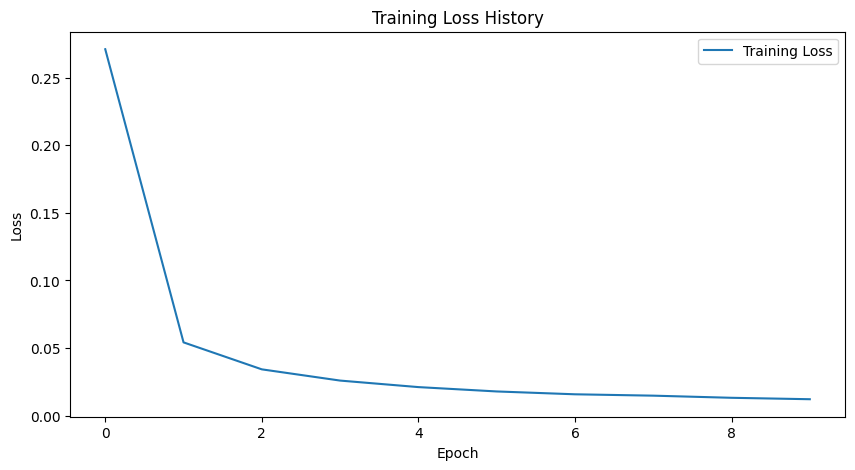

In [ ]:
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained=True)
model.classifier[4] = nn.Conv2d(256, 5, kernel_size=(1, 1))
nn.init.xavier_uniform_(model.classifier[4].weight)  # Initialize the new layer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = model.to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, train_loader, criterion, optimizer, num_epochs=25):
    model.train()
    history = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)['out']
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # Append averaged loss for this epoch
        epoch_loss = running_loss / len(train_loader)
        history.append(epoch_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

    return history

def evaluate_model(model, test_loader):
    model.eval()
    predictions_list = []

    with torch.no_grad():
        for test_images in test_loader:
            test_images = test_images.to(device)

            # Forward pass
            outputs = model(test_images)['out']
            predictions = outputs.argmax(dim=1)

            # Store predictions
            predictions_list.append(predictions.cpu().numpy())

    return predictions_list

# Plot training history
def plot_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history, label='Training Loss')
    plt.title('Training Loss History')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Train the model
history = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

# Evaluate the model
predictions = evaluate_model(model, test_loader)

# Plot the history
plot_history(history)